Text(0.5, 1.0, 'Image with Second Contour')

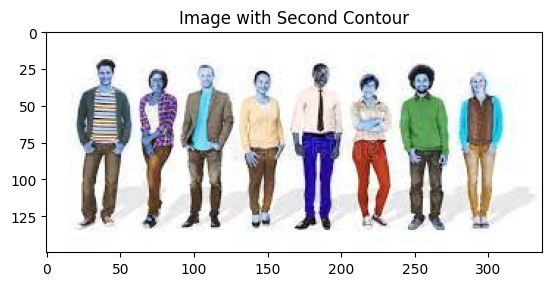

In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image=cv2.imread(r"people.jpg")
plt.imshow(image),
plt.title('Image with persons')

In [47]:
# Minimum probability to filter weak detections
confidence_threshold = 0.2

# Initialize the list of class labels MobileNet SSD was trained to
# detect, then generate a set of bounding box colors for each class
CLASSES = ["person"]
COLORS = np.random.uniform(0, 255)

# Load our serialized model from disk
net = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt', 'MobileNetSSD_deploy.caffemodel')


In [48]:

(h, w) = image.shape[:2]
scale_factor = 800 / w # we want width=800, and want to keep the aspect ratio
dim = (int(w * scale_factor), int(h * scale_factor))
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
	
	# Grab the new frame dimensions
(h, w) = image.shape[:2]
	
	# Convert the frame to a blob
blob = cv2.dnn.blobFromImage(image, 0.007843, (300, 300), 127.5)

	# Pass the blob through the network and obtain the detections and predictions
net.setInput(blob)
detections = net.forward()


Text(0.5, 1.0, '8 people Detected')

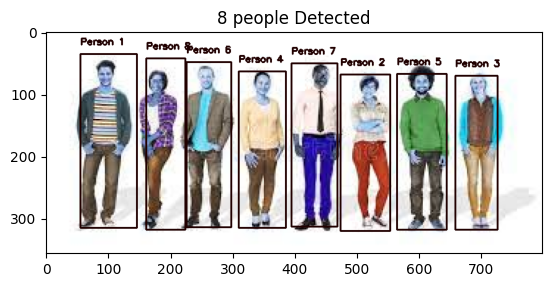

In [49]:
nbe_of_people=0
for i in np.arange(0, detections.shape[2]):
		# Extract the confidence (i.e., probability) associated with the prediction
		confidence = detections[0, 0, i, 2]

		# Filter out weak detections by ensuring the `confidence` is
		# greater than the minimum confidence
		if confidence > confidence_threshold:
			nbe_of_people+=1
			# Extract the index of the class label from the
			# `detections`, then compute the (x, y)-coordinates of
			# the bounding box for the object
			idx = int(detections[0, 0, i, 1])
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")

			# Draw the prediction on the frame
			label = "Person "+str(nbe_of_people)
			cv2.rectangle(image, (startX, startY), (endX, endY),COLORS , 2)
			y = startY - 15 if startY - 15 > 15 else startY + 15
			cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS, 2)

#cv2.imshow("Person detected", image)
plt.imshow(image),
plt.title(str(nbe_of_people)+' people Detected')